In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


## Load the Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Loading the Data

In [3]:
train = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

The data is loaded, let's examine it.

## Exploratory Data Analysis

  * Visualizing key statisctics and relationship in the data
  * Correctly identify the feature types

### Shape of training dataset

In [4]:
train.shape

(175000, 17)

### **Check data samples**

Let's look at a few data samples with `head()`
 and `tail()` method.

In [5]:
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [6]:
train.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00
174999,1,2023-06-30 21:26:43,2023-06-30 22:54:42,1.0,1.01,1.0,N,153,72,Credit Card,1.0,6.541699,0.0,1.0,16.32,2.5,0.00


### **Data Statistics**

Let's use `info()` method to get quick description of data.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

* Toatl entries: 17500
* There are toatl 17 columns: 16 features + 1 label
   * Label : `toatl_amount`
   * Features : `['VendorID' 'tpep_pickup_datetime' 'tpep_dropoff_datetime'
 'passenger_count' 'trip_distance' 'RatecodeID' 'store_and_fwd_flag'
 'PULocationID' 'DOLocationID' 'payment_type' 'extra' 'tip_amount'
 'tolls_amount' 'improvement_surcharge' 'congestion_surcharge'
 'Airport_fee']`

* Four features are of object type and rest are numeric(float64 & int64)

Feature Discription : 
* total_amount: The total amount paid by the traveler for the taxi ride.

* VendorID: An identifier for taxi vendors.

* tpep_pickup_datetime and tpep_dropoff_datetime: Timestamps indicating pickup and dropoff times.

* passenger_count: The number of passengers during the ride.

* trip_distance: The distance traveled during the trip.

* RatecodeID: Rate code for the ride.

* store_and_fwd_flag: A flag indicating whether the trip data was stored and forwarded.

* PULocationID and DOLocationID: Pickup and dropoff location identifiers.

* payment_type: Payment type used for the ride.

other columns are self-explanatory and contribute to the modeling process.

In order to understand the numeric attribites, we use `describe()` method.

In [8]:
train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


In order to understand the object attributes, we use `describe(include="object")` method.

In [9]:
train.describe(include="object")

,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag,payment_type
count,175000,175000,168923,175000
unique,109877,109713,2,5
top,2023-06-28 18:11:16,2023-06-29 19:08:22,N,Credit Card
freq,8,10,167729,135257


### **Visulaize the distribution of values in each column**

The information can be viewed through `histogram` plot.

*  A Histogram gives the count of how many samples occurs within a specific range (bins).
*  The x-axis denotes the range of values in a feature and
*  The y-axis denotes the frequency of samples with those specific values.

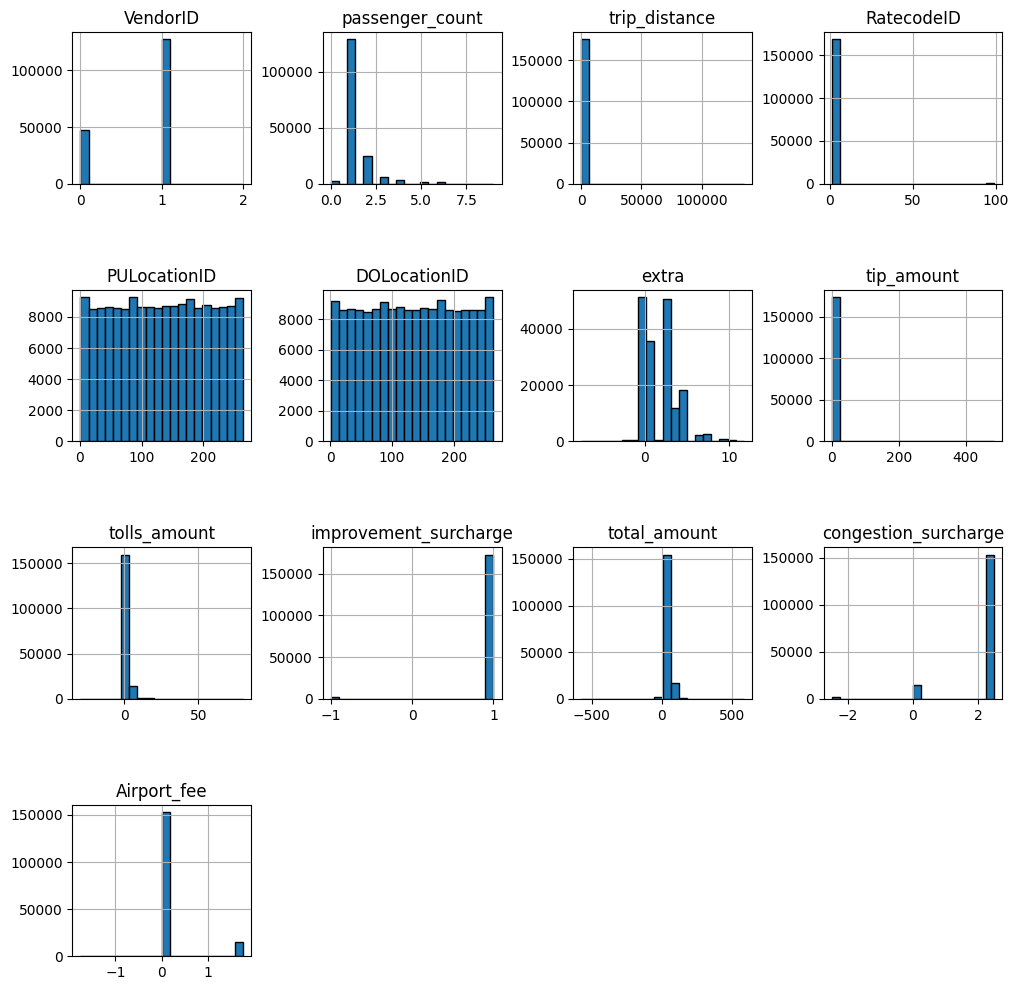

In [10]:
train.hist(figsize=(12, 12), bins=20, edgecolor="black")
plt.subplots_adjust(hspace=0.7,wspace=0.4)

A few observations based on these plots:

1. Features are at different scales.
2. Features have different distributions

In [11]:
features = ['passenger_count','RatecodeID','store_and_fwd_flag','congestion_surcharge','Airport_fee']
for x in features:
  print(train[x].value_counts())
  print("=====================================")

passenger_count
1.0    128534
2.0     24316
3.0      6018
4.0      3668
0.0      2818
5.0      1970
6.0      1596
8.0         2
9.0         1
Name: count, dtype: int64
RatecodeID
1.0     158652
2.0       7314
5.0       1036
99.0       748
3.0        727
4.0        446
Name: count, dtype: int64
store_and_fwd_flag
N    167729
Y      1194
Name: count, dtype: int64
congestion_surcharge
 2.5    153212
 0.0     14325
-2.5      1386
Name: count, dtype: int64
Airport_fee
 0.00    153074
 1.75     15590
-1.75       259
Name: count, dtype: int64


### **Visualization of Quartiles**

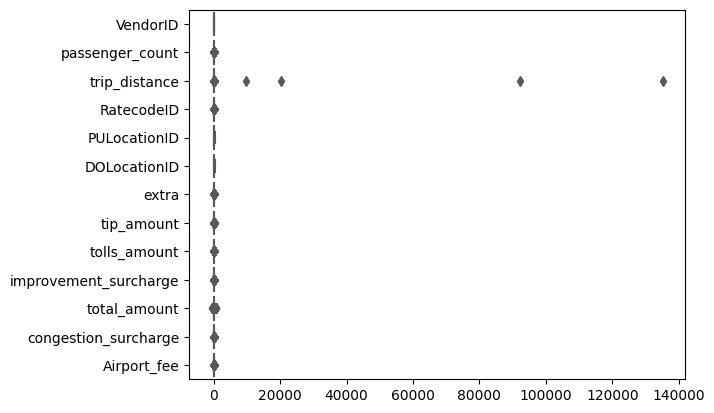

In [12]:
sns.boxplot(data=train,orient="h",palette="Set2")
plt.show()

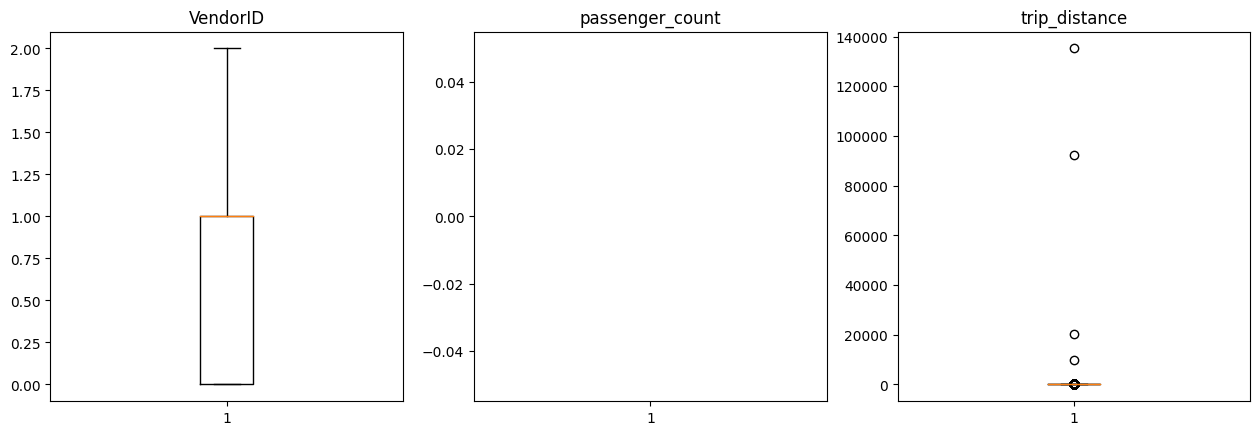

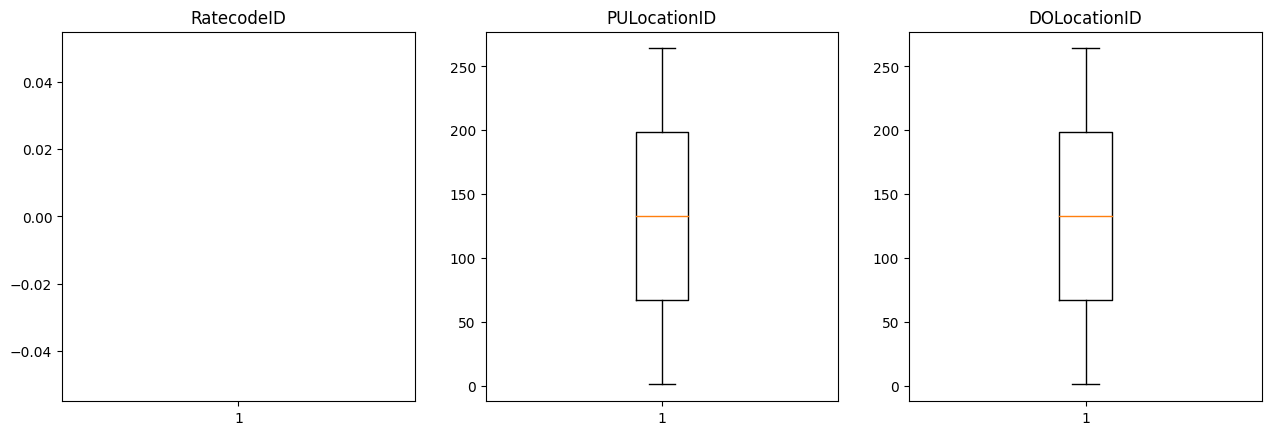

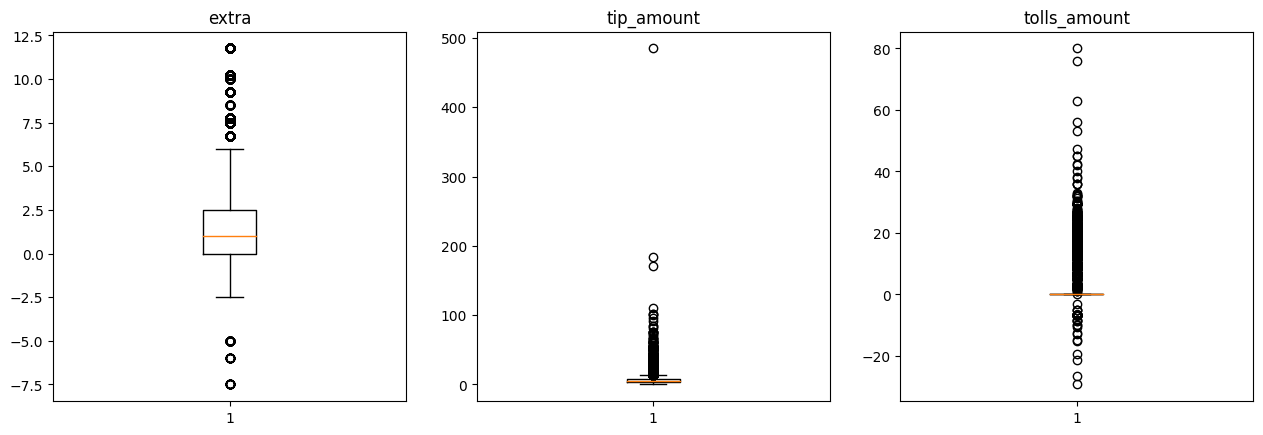

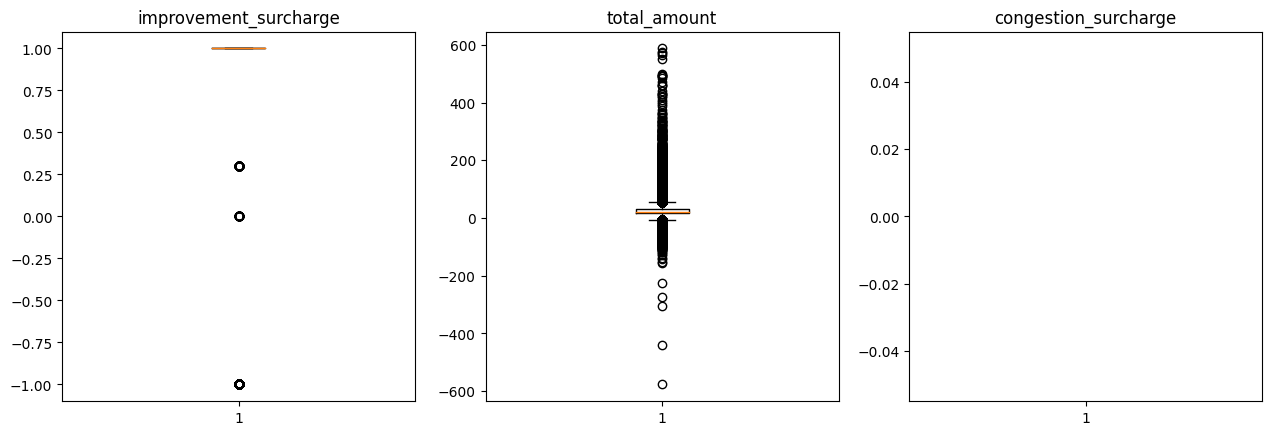

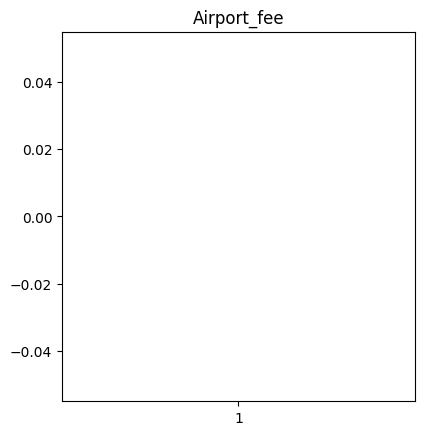

In [13]:
features = ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID','PULocationID', 'DOLocationID','extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount','congestion_surcharge', 'Airport_fee']
for x in features[0:3]:
    plt.subplot(1,3,features.index(x)+1)
    plt.subplots_adjust(right=2)
    plt.boxplot(train[x])
    plt.title(x)
plt.show()

for x in features[3:6]:
    plt.subplot(1,3,features.index(x)-2)
    plt.subplots_adjust(right=2)
    plt.boxplot(train[x])
    plt.title(x)
plt.show()

for x in features[6:9]:
    plt.subplot(1,3,features.index(x)-5)
    plt.subplots_adjust(right=2)
    plt.boxplot(train[x])
    plt.title(x)
plt.show()

for x in features[9:12]:
    plt.subplot(1,3,features.index(x)-8)
    plt.subplots_adjust(right=2)
    plt.boxplot(train[x])
    plt.title(x)
plt.show()

plt.subplot(1,3,1)
plt.subplots_adjust(right=2)
plt.boxplot(train['Airport_fee'])
plt.title('Airport_fee')
plt.show()

I have not removed any outlier.

### **Relationship between features**

*  **Standard correlation coefficient** between features.
  *  Ranges between -1 to +1
    * **Correlation = +1**: Strong positive correlation between features
    * **Correlation = -1**: Strong negative correlation between features
    * **Correlation = 0**: No linear correlation between features
  * Visualization with heat map
* Only captures linear relationship between features.
  * For non-linear relationship, use **rank correlation**

Let's calculate correlations between our features.

In [14]:
corr_matrix = train.select_dtypes(include = ['int64','float64']).corr()

Let's visualize correlation matrix with heatmap:

<Axes: >

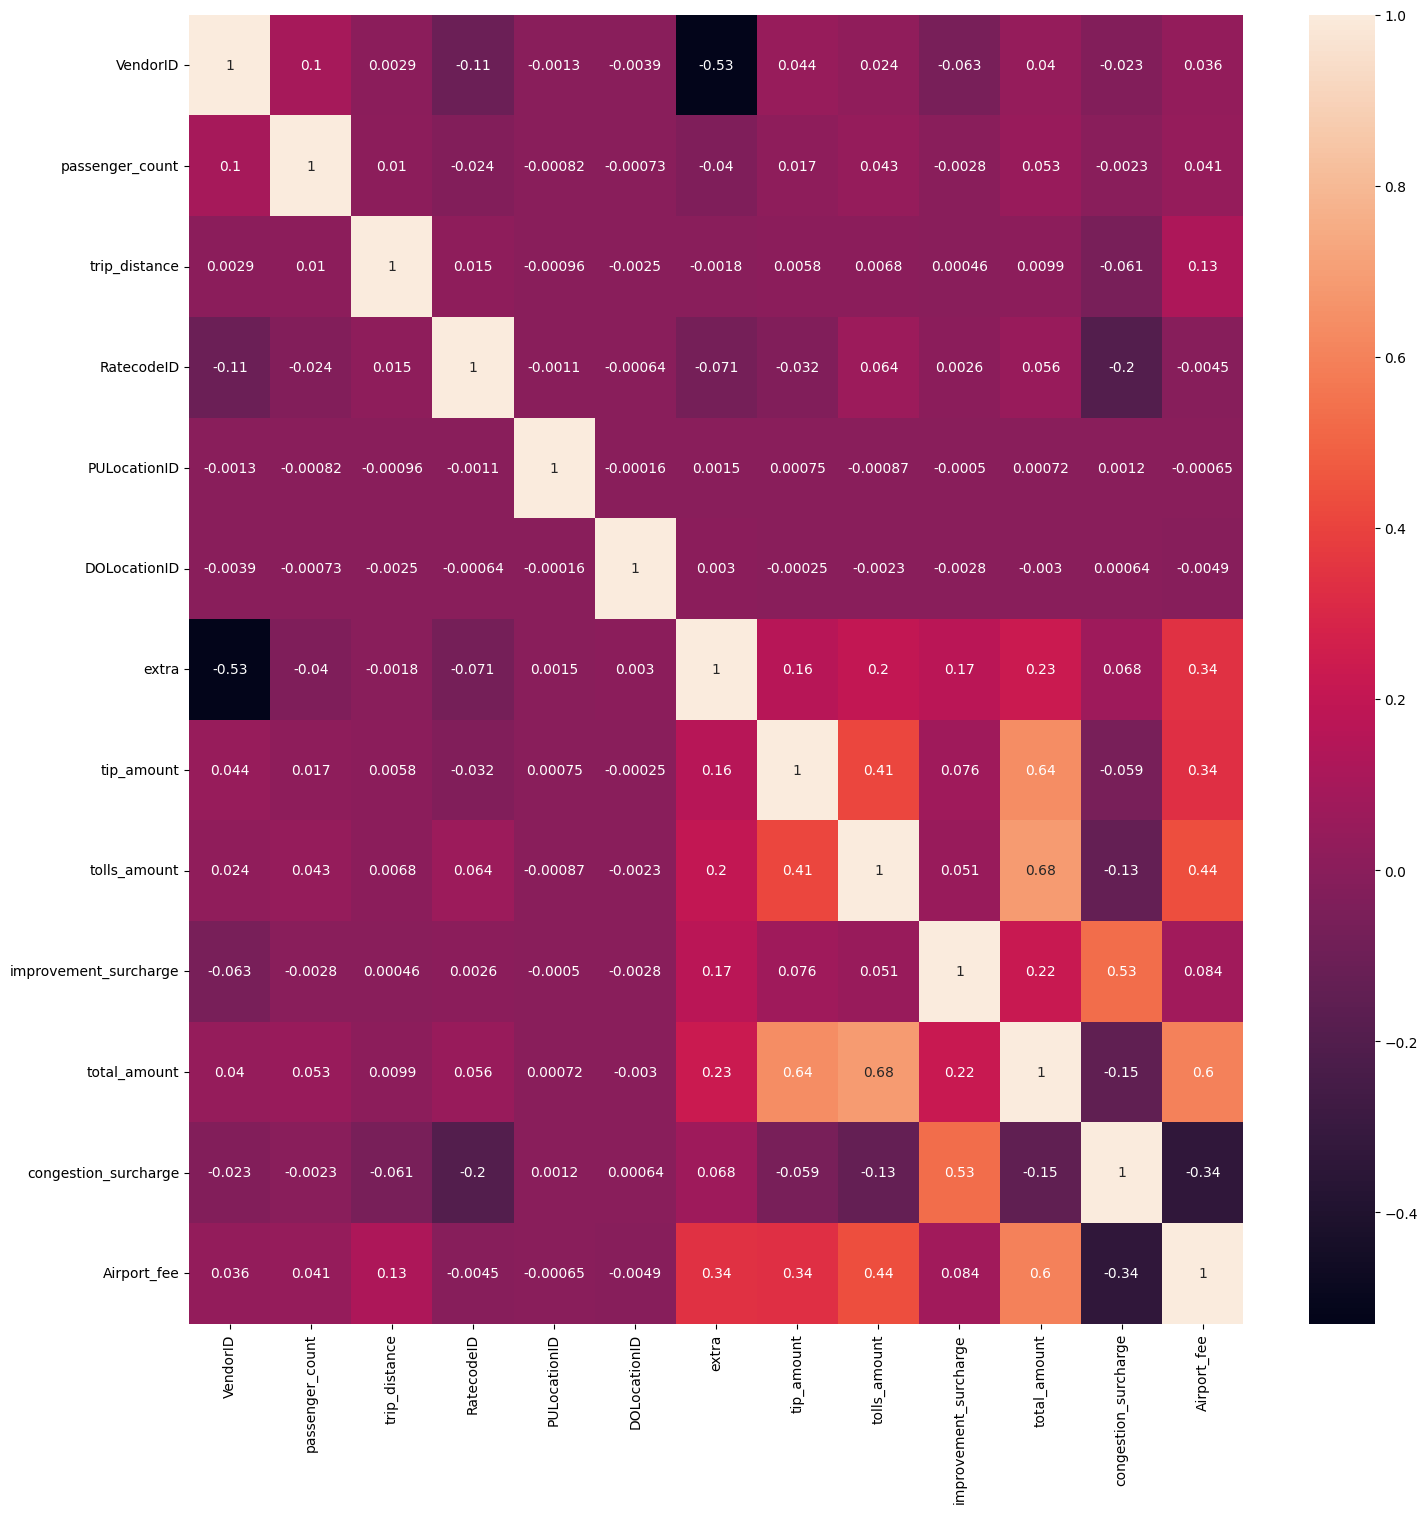

In [15]:
plt.figure(figsize=(17,17))
sns.heatmap(corr_matrix, annot=True)

* The correlation coefficient on digonal is +1.
* Darker colors represent negative correlations, while fainter colors denote positive correlations.
* `total_amount` has positive correlation with `tip_amount,tolls_amount and Airport_fee`

There is no significant correlation bewteen any two features.

Another option to visualize the relationship between the feature is with `scatter matrix`.

For convenience of visualization, I have shown it for a small number of attributes.

array([[<Axes: xlabel='total_amount', ylabel='total_amount'>,
        <Axes: xlabel='extra', ylabel='total_amount'>,
        <Axes: xlabel='tip_amount', ylabel='total_amount'>,
        <Axes: xlabel='tolls_amount', ylabel='total_amount'>,
        <Axes: xlabel='improvement_surcharge', ylabel='total_amount'>,
        <Axes: xlabel='congestion_surcharge', ylabel='total_amount'>,
        <Axes: xlabel='Airport_fee', ylabel='total_amount'>],
       [<Axes: xlabel='total_amount', ylabel='extra'>,
        <Axes: xlabel='extra', ylabel='extra'>,
        <Axes: xlabel='tip_amount', ylabel='extra'>,
        <Axes: xlabel='tolls_amount', ylabel='extra'>,
        <Axes: xlabel='improvement_surcharge', ylabel='extra'>,
        <Axes: xlabel='congestion_surcharge', ylabel='extra'>,
        <Axes: xlabel='Airport_fee', ylabel='extra'>],
       [<Axes: xlabel='total_amount', ylabel='tip_amount'>,
        <Axes: xlabel='extra', ylabel='tip_amount'>,
        <Axes: xlabel='tip_amount', ylabel='tip_amou

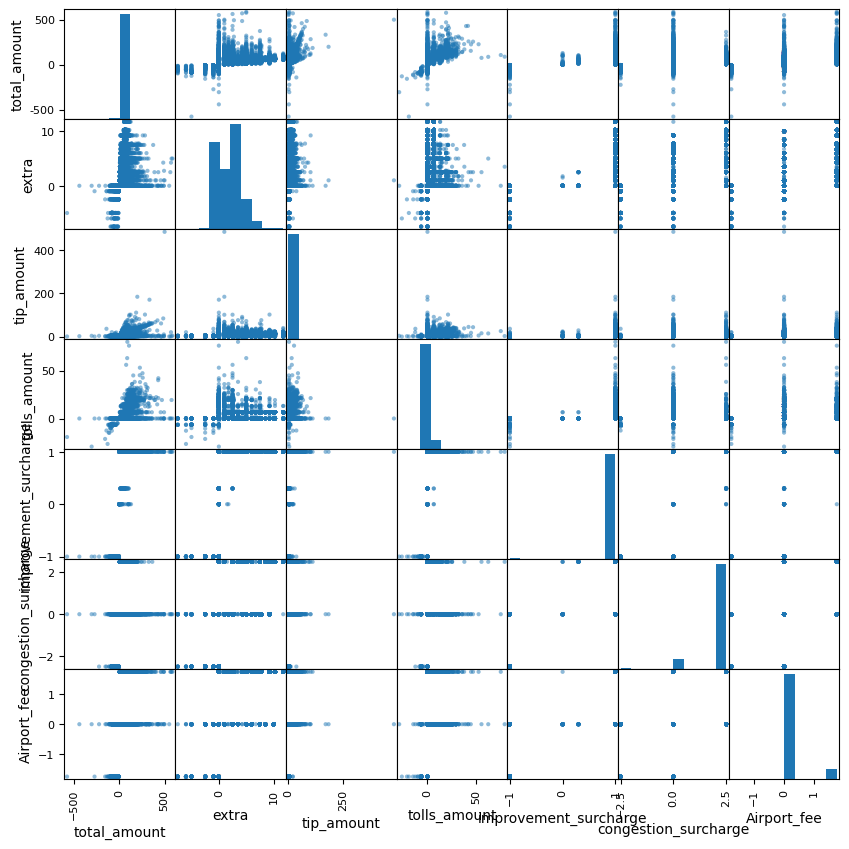

In [16]:
attribute_list = ['total_amount','extra','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee']
scatter_matrix(train[attribute_list],figsize=(10,10))

## Data Preprocessing : Prepare Data for ML Algorithm

### Separate features and labels from the training dataset

In [17]:
y = train['total_amount']
X = train.drop(columns=['total_amount','tpep_pickup_datetime','tpep_dropoff_datetime'])

In [18]:
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size=0.2,random_state=42)

### Data Cleaning

Let's first check if there are any missing values in feature matrix:

In [19]:
X_train.isna().sum()

VendorID                    0
passenger_count          4841
trip_distance               0
RatecodeID               4841
store_and_fwd_flag       4841
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     4841
Airport_fee              4841
dtype: int64

There are missing values and we will use imputation techniques to fill up missing values.

*  Data imputation identifies **missing values** in each feature of the dataset and **replaces** them with an **appropriate value** based on a **fixed strategy** such as
  *    **mean** or **median** or **mode** of that feature.
  *    **use specified constant** value.

* Sklearn library provides ```
sklearn.impute.SimpleImputer ``` class for this purpose.

In [20]:
num_attribs = ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID','extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge','congestion_surcharge', 'Airport_fee']
cat_attribs = ['store_and_fwd_flag','payment_type']
impute_pipeline = ColumnTransformer([
    ("num",SimpleImputer(strategy="mean"),num_attribs),
    ("cat",SimpleImputer(strategy="most_frequent"),cat_attribs),
])
X_train = impute_pipeline.fit_transform(X_train)
X_validation = impute_pipeline.transform(X_validation)

In [21]:
X_train = pd.DataFrame(X_train, columns=['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID','PULocationID', 'DOLocationID','extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge','congestion_surcharge', 'Airport_fee','store_and_fwd_flag','payment_type'])
X_validation = pd.DataFrame(X_validation, columns=['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID','PULocationID', 'DOLocationID','extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge','congestion_surcharge', 'Airport_fee','store_and_fwd_flag','payment_type'])

In [22]:
X_train

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,store_and_fwd_flag,payment_type
0,1.0,1.0,7.79,1.0,181.0,174.0,1.0,7.956385,0.0,1.0,0.0,1.75,N,Credit Card
1,1.0,1.0,0.79,1.0,250.0,226.0,2.5,2.276785,0.0,1.0,2.5,0.0,N,Credit Card
2,1.0,1.0,0.29,2.0,236.0,251.0,0.0,1.062698,0.0,-1.0,-2.5,0.0,N,unknown
3,0.0,1.0,0.6,1.0,83.0,166.0,3.5,2.444217,0.0,1.0,2.5,0.0,N,Credit Card
4,0.0,1.0,1.9,1.0,70.0,35.0,5.0,5.16392,0.0,1.0,2.5,0.0,N,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,1.0,1.0,1.49,1.0,101.0,202.0,0.0,3.260969,0.0,1.0,0.0,0.0,N,Credit Card
139996,0.0,1.0,1.6,1.0,221.0,41.0,2.5,3.382305,0.0,1.0,2.5,0.0,N,Credit Card
139997,0.0,1.0,1.8,1.0,18.0,128.0,2.5,6.751209,0.0,1.0,2.5,0.0,N,Credit Card
139998,1.0,1.0,0.6,1.0,84.0,226.0,2.5,1.815167,0.0,1.0,2.5,0.0,N,Cash


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140000 entries, 0 to 139999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   VendorID               140000 non-null  object
 1   passenger_count        140000 non-null  object
 2   trip_distance          140000 non-null  object
 3   RatecodeID             140000 non-null  object
 4   PULocationID           140000 non-null  object
 5   DOLocationID           140000 non-null  object
 6   extra                  140000 non-null  object
 7   tip_amount             140000 non-null  object
 8   tolls_amount           140000 non-null  object
 9   improvement_surcharge  140000 non-null  object
 10  congestion_surcharge   140000 non-null  object
 11  Airport_fee            140000 non-null  object
 12  store_and_fwd_flag     140000 non-null  object
 13  payment_type           140000 non-null  object
dtypes: object(14)
memory usage: 15.0+ MB


### Data Preprocessing

**Feature Encoding**

- Converting the categorical features into numerical features.

- I will use `LabelEncoder` for transforming categorical features into integer codes.


**Feature Scaling**

- Standardization is feature scaling technique that results into (close to) zero mean and unit standard deviation of a feature's values.

- Formula for standardization:

$$X_{new} = \dfrac{X_{old}- \mu}{\sigma}$$

   Here, $\mu$ and $\sigma$ respectively are the mean and standard deviation of the feature values.

Standardization can be achieved by StandardScaler from sklearn library.

In [24]:
num_attribs = ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID','extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge','congestion_surcharge', 'Airport_fee']
cat_attribs = ['store_and_fwd_flag','payment_type']
preprocess_pipeline = ColumnTransformer([
    ("num",MinMaxScaler(),num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])
X_train = preprocess_pipeline.fit_transform(X_train)
X_validation = preprocess_pipeline.transform(X_validation)

In [25]:
X_train

array([[5.00000000e-01, 1.11111111e-01, 5.76259897e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e-01, 1.11111111e-01, 5.84397072e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e-01, 1.11111111e-01, 2.14525507e-06, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.11111111e-01, 1.33153763e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e-01, 1.11111111e-01, 4.43845877e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e-01, 1.11111111e-01, 1.47948626e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

**Polynomial Transformation**

In [26]:
Poly = PolynomialFeatures(degree=3)
X_train_poly = Poly.fit_transform(X_train)
X_validation_poly = Poly.transform(X_validation)

## Train ML Model

### Baseline Model

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [28]:
lin_reg.score(X_train,y_train) # Score on Training Dataset

0.7252873593092519

In [29]:
lin_reg.score(X_validation,y_validation) # Score on Validation Dataset

0.7221024708536343

**Linear Regression with Cross Validation**

In [30]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
lin_reg_cv = cross_validate(LinearRegression(),X_train,y_train,cv=cv,scoring='r2',return_train_score=True,return_estimator=True)
print(lin_reg_cv['train_score'])

[0.72594665 0.72069947 0.72405698 0.73493873 0.72109658 0.72478319
 0.72490961 0.72688604 0.72777149 0.72721569]


In [31]:
max(lin_reg_cv['train_score']) # Best Score on Training Dataset

0.734938725120083

In [32]:
lin_reg_cv['estimator'][np.argmax(lin_reg_cv['train_score'])].score(X_validation,y_validation) # Score on Validation Datase

0.7218706632533278

**SGD with Cross Validation**

In [33]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
sgd_reg_cv = cross_validate(SGDRegressor(learning_rate='optimal',max_iter=1000),X_train,y_train,cv=cv,scoring='r2',return_train_score=True,return_estimator=True)
print(sgd_reg_cv['train_score'])

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stocha

[-1.99820136e+10 -1.40933969e+10 -2.57952200e+10 -2.45850271e+10
 -9.16040071e+10 -8.24512947e+10 -1.01590144e+11 -4.05570562e+10
 -7.92015044e+09 -2.30260125e+10]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [34]:
max(sgd_reg_cv['train_score']) # Best Score on Training Dataset

-7920150442.175556

In [35]:
sgd_reg_cv['estimator'][np.argmax(sgd_reg_cv['train_score'])].score(X_validation,y_validation) # Score on Validation Dataset

-7828966674.196591

**SGD with Cross Validation : HPT**

In [36]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
param_grid = {'penalty':['l1','l2'],'alpha':[0.1,0.01,0.001,0.005,0.001],'max_iter':[1000,5000,10000]}
sgd_grid_search = GridSearchCV(SGDRegressor(),param_grid=param_grid,cv=cv,scoring='r2',return_train_score=True)
sgd_grid_search.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stocha

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=SGDRegressor(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.005, 0.001],
                         'max_iter': [1000, 5000, 10000],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='r2')

In [37]:
sgd_grid_search.best_score_ # Best Score on Training Dataset

0.7185401681257402

In [38]:
sgd_grid_search.best_estimator_.score(X_validation,y_validation) # Score on Validation Dataset

0.7128051332713132

**Polynomial Regression with Cross Validation (degree 2)**

In [39]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
poly_reg_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])
poly_reg_cv = cross_validate(poly_reg_pipeline,X_train,y_train,cv=cv,scoring='r2',return_train_score=True,return_estimator=True)
print(poly_reg_cv['train_score'])

[0.88719653 0.88448806 0.88356764 0.89334431 0.88737497 0.88623724
 0.90900492 0.90777267 0.89282637 0.91265581]


In [40]:
max(poly_reg_cv['train_score']) # Best Score on Training Dataset

0.9126558071984936

In [41]:
poly_reg_cv['estimator'][np.argmax(poly_reg_cv['train_score'])].score(X_validation,y_validation) # Score on Validation Dataset

0.9135838481282379

**Polynomial Regression with Cross Validation (degree 3)**

In [42]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
poly2_reg_cv = cross_validate(LinearRegression(),X_train_poly,y_train,cv=cv,scoring='r2',return_train_score=True,return_estimator=True)
print(poly2_reg_cv['train_score'])

[0.94212696 0.94075237 0.94212875 0.94923215 0.94092364 0.94338787
 0.94408843 0.94101158 0.94603047 0.94420753]


In [43]:
max(poly2_reg_cv['train_score']) # Best Score on Training Dataset

0.9492321465188706

In [44]:
poly2_reg_cv['estimator'][np.argmax(poly2_reg_cv['train_score'])].score(X_validation_poly,y_validation) # Score on Validation Dataset

-10739067964836.646

**KNN Regression**

In [45]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [46]:
knn.score(X_train,y_train) # Best Score on Training Dataset

0.8709119037258316

In [47]:
knn.score(X_validation,y_validation) # Score on Validation Dataset

0.557691116662525

**KNN Regression : HPT**

In [48]:
model = []
score = []
for n in range(2,12):
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train,y_train)
  model.append(knn)
  score.append(knn.score(X_train,y_train))

In [49]:
score

[0.8709119037258316,
 0.807837588714972,
 0.7709588003040833,
 0.7436274719892945,
 0.7236343090961211,
 0.7080570677122848,
 0.6943756107716399,
 0.6832878093015109,
 0.6731504023689503,
 0.6647373795353909]

In [50]:
max(score) # Best Score on Training Dataset

0.8709119037258316

In [51]:
model

[KNeighborsRegressor(n_neighbors=2),
 KNeighborsRegressor(n_neighbors=3),
 KNeighborsRegressor(n_neighbors=4),
 KNeighborsRegressor(),
 KNeighborsRegressor(n_neighbors=6),
 KNeighborsRegressor(n_neighbors=7),
 KNeighborsRegressor(n_neighbors=8),
 KNeighborsRegressor(n_neighbors=9),
 KNeighborsRegressor(n_neighbors=10),
 KNeighborsRegressor(n_neighbors=11)]

In [52]:
model[score.index(max(score))].score(X_validation,y_validation) # Score on Validation Dataset

0.557691116662525

**SVM Regressor**

In [53]:
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [54]:
svr.score(X_train,y_train) # Best Score on Training Dataset

0.6192610467727442

In [55]:
svr.score(X_validation,y_validation) # Score on Validation Dataset

0.6081697399379975

**Bagging Regressor**

In [56]:
from sklearn.ensemble import BaggingRegressor
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
br_reg_cv = cross_validate(BaggingRegressor(random_state=42),X_train,y_train,cv=cv,scoring="r2",return_train_score=True,return_estimator=True)
print(br_reg_cv['train_score'])

[0.98836482 0.98681769 0.98633879 0.98867867 0.98704893 0.98696008
 0.98818253 0.98814317 0.98739871 0.988899  ]


In [57]:
max(br_reg_cv['train_score']) # Best Score on Training Dataset

0.9888989957278019

In [58]:
br_reg_cv['estimator'][np.argmax(br_reg_cv['train_score'])].score(X_validation,y_validation) # Score on Validation Dataset

0.9430835922705383

**Decision Tree**

In [59]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
dt_reg_cv = cross_validate(DecisionTreeRegressor(max_depth =3, random_state = 42),X_train,y_train,cv=cv,scoring="r2",return_train_score=True,return_estimator=True)
print(dt_reg_cv['train_score'])

[0.74259263 0.73539556 0.73713817 0.74455334 0.74812615 0.73752345
 0.74076537 0.73945277 0.74335997 0.74584724]


In [60]:
max(dt_reg_cv['train_score']) # Best Score on Training Dataset

0.7481261537455703

In [61]:
dt_reg_cv['estimator'][np.argmax(dt_reg_cv['train_score'])].score(X_validation,y_validation) # Score on Validation Dataset

0.759195573911438

**Decision Tree : HPT**

In [62]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
param_grid = {'max_depth': range(1, 20),
              'min_samples_split':range(2,8)}
dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),
                                 param_grid=param_grid,
                                 n_jobs=2,
                                 cv=cv,
                                 scoring="r2",
                                 return_train_score=True)
dt_grid_search.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=DecisionTreeRegressor(random_state=42), n_jobs=2,
             param_grid={'max_depth': range(1, 20),
                         'min_samples_split': range(2, 8)},
             return_train_score=True, scoring='r2')

In [63]:
dt_grid_search.best_score_ # Best Score on Training Dataset

0.8990255275822537

In [64]:
dt_grid_search.best_estimator_ 

DecisionTreeRegressor(max_depth=19, min_samples_split=6, random_state=42)

In [65]:
dt_grid_search.best_estimator_.score(X_validation,y_validation) # Score on Validation Dataset

0.9097823881996615

**RandomForest Regressor**

In [66]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
rfr_reg_cv = cross_validate(RandomForestRegressor(random_state=42),X_train,y_train,cv=cv,scoring="r2",return_train_score=True,return_estimator=True)
print(rfr_reg_cv['train_score'])

[0.99116115 0.99011392 0.99097006 0.99184378 0.99073987 0.99135666
 0.99138317 0.99114165 0.9911636  0.99184366]


In [67]:
max(rfr_reg_cv['train_score']) # Best Score on Training Dataset

0.9918437798538001

In [68]:
rfr_reg_cv['estimator'][np.argmax(rfr_reg_cv['train_score'])].score(X_validation,y_validation) # Score on Validation Dataset

0.9565490603838519

**RandomForest Regressor : HPT**

In [69]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
}
rfr_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv= 5)
rfr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [70]:
rfr_grid_search.best_score_ # Best Score on Training Dataset

0.9326694661269503

In [71]:
rfr_grid_search.best_estimator_ 

RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=42)

In [72]:
rfr_grid_search.best_estimator_.score(X_validation,y_validation) # Score on Validation Dataset

0.947926947200844

**AdaBoost Regressor**

In [73]:
from sklearn.ensemble import AdaBoostRegressor
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
adaboost_reg_cv = cross_validate(AdaBoostRegressor(random_state=42),X_train,y_train,cv=cv,scoring="r2",return_train_score=True,return_estimator=True)
print(adaboost_reg_cv['train_score'])

[0.59583724 0.64861296 0.72555384 0.66558003 0.71884212 0.60166607
 0.6384764  0.64685951 0.68556658 0.78685896]


In [74]:
max(adaboost_reg_cv['train_score']) # Best Score on Training Dataset

0.7868589604657831

In [75]:
adaboost_reg_cv['estimator'][np.argmax(adaboost_reg_cv['train_score'])].score(X_validation, y_validation) # Score on Validation Dataset

0.7843650222969155

**GradientBoosting Regressor**

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
gbr_reg_cv = cross_validate(GradientBoostingRegressor(random_state=42),X_train,y_train,cv=cv,scoring="r2",return_train_score=True,return_estimator=True)
print(gbr_reg_cv['train_score'])

[0.90328464 0.89959333 0.90183615 0.91081144 0.9028497  0.90250999
 0.90626721 0.90110522 0.90615211 0.9054722 ]


In [77]:
max(gbr_reg_cv['train_score']) # Best Score on Training Dataset

0.9108114430830193

In [78]:
gbr_reg_cv['estimator'][np.argmax(gbr_reg_cv['train_score'])].score(X_validation, y_validation) # Score on Validation Dataset

0.9082356864497101

**MLPRegressor**

In [79]:
from sklearn.neural_network import MLPRegressor
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
mlp_reg_cv = cross_validate(MLPRegressor(hidden_layer_sizes=(32),max_iter=5000,random_state=42),X_train,y_train,cv=cv,scoring="r2",return_train_score=True,return_estimator=True)
print(mlp_reg_cv['train_score'])

[0.90794177 0.89792345 0.89803265 0.91193051 0.88839529]


In [80]:
max(mlp_reg_cv['train_score']) # Best Score on Training Dataset

0.9119305114808874

In [81]:
mlp_reg_cv['estimator'][np.argmax(mlp_reg_cv['train_score'])].score(X_validation,y_validation) # Score on Validation Dataset

0.9105075142610775

**Analysis of the models' performance under various conditions**

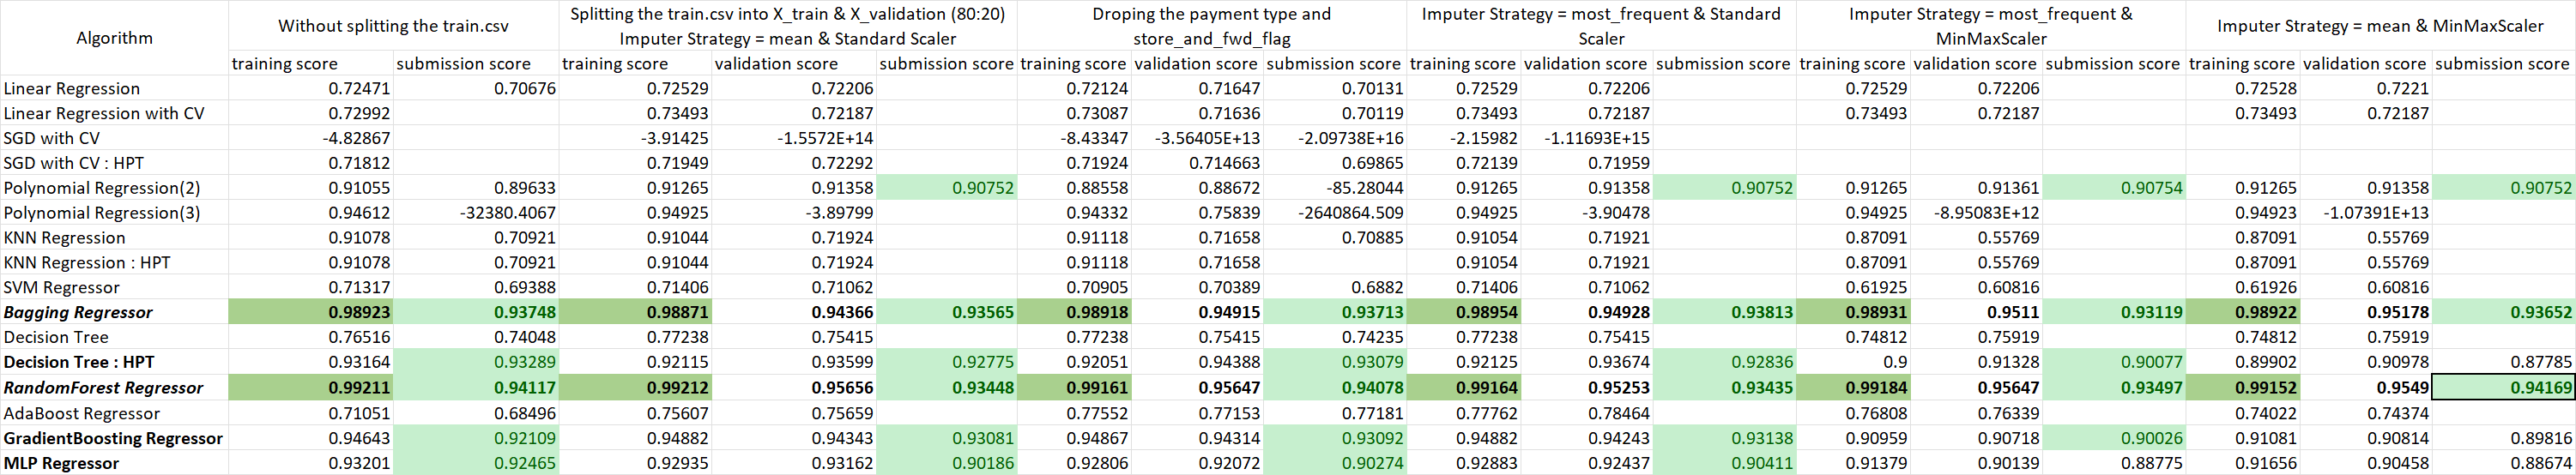

* Splitting the train.csv into X_train & X_validation caused a slight dip in performance. But it is a better startegy to avoid overfitting.
* There was no significant effect,rather a slight dip, of dropping the two categorical features i.e, payment type & store_and_fwd_flag. Hence, I decided not to drop it.
* If we adopt mean as an imputation startegy, then models in general have performed better on standard scaling.
* If we adpot most_frequent as an imputation strategy, then models in general have performed better on standard scaling.
* The best performing model is RandomForrestRegressor across various conditions. However, it has performed best on mean impuatation & MinMaxScaler.

## Preparing the Test Dataset

In [82]:
test = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

In [83]:
test.shape

(50000, 16)

In [84]:
test.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        48221 non-null  float64
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             48221 non-null  float64
 6   store_and_fwd_flag     48221 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 non-null  object 
 10  extra                  50000 non-null  float64
 11  tip_amount             50000 non-null  float64
 12  tolls_amount           50000 non-null  float64
 13  improvement_surcharge  50000 non-null  float64
 14  congestion_surcharge   48221 non-null  float64
 15  Ai

In [86]:
X_test = test.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime'])

In [87]:
X_test.isna().sum()

VendorID                    0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

In [88]:
X_test = impute_pipeline.transform(X_test)

In [89]:
X_test = pd.DataFrame(X_test, columns=['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID','PULocationID', 'DOLocationID','extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge','congestion_surcharge', 'Airport_fee','store_and_fwd_flag','payment_type'])

In [90]:
X_test

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,store_and_fwd_flag,payment_type
0,1.0,1.0,4.95,1.0,20.0,3.0,1.0,6.067612,0.0,1.0,2.5,0.0,N,Credit Card
1,1.0,1.0,2.1,1.0,9.0,81.0,2.5,6.191269,0.0,1.0,2.5,0.0,N,Credit Card
2,1.0,1.0,0.95,1.0,92.0,90.0,2.5,3.983872,0.0,1.0,2.5,0.0,N,Cash
3,0.0,1.0,0.8,1.0,19.0,102.0,3.5,6.839341,0.0,1.0,2.5,0.0,N,Credit Card
4,1.0,1.0,4.01,1.0,131.0,229.0,0.0,1.468943,0.0,1.0,0.0,0.0,N,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,1.0,0.61,1.0,48.0,72.0,2.5,4.043482,0.0,1.0,2.5,0.0,N,Credit Card
49996,1.0,1.0,5.02,1.0,57.0,103.0,1.0,2.895882,0.0,1.0,0.0,1.75,N,Cash
49997,1.0,1.0,1.92,1.0,150.0,78.0,1.0,5.63659,0.0,1.0,2.5,0.0,N,Credit Card
49998,0.0,1.0,5.4,1.0,4.0,154.0,3.5,7.293144,0.0,1.0,2.5,0.0,N,Credit Card


In [91]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   VendorID               50000 non-null  object
 1   passenger_count        50000 non-null  object
 2   trip_distance          50000 non-null  object
 3   RatecodeID             50000 non-null  object
 4   PULocationID           50000 non-null  object
 5   DOLocationID           50000 non-null  object
 6   extra                  50000 non-null  object
 7   tip_amount             50000 non-null  object
 8   tolls_amount           50000 non-null  object
 9   improvement_surcharge  50000 non-null  object
 10  congestion_surcharge   50000 non-null  object
 11  Airport_fee            50000 non-null  object
 12  store_and_fwd_flag     50000 non-null  object
 13  payment_type           50000 non-null  object
dtypes: object(14)
memory usage: 5.3+ MB


In [92]:
X_test = preprocess_pipeline.transform(X_test)

In [93]:
X_test_poly = Poly.transform(X_test)

In [94]:
X_test

array([[5.00000000e-01, 1.11111111e-01, 3.66172849e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e-01, 1.11111111e-01, 1.55346057e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e-01, 1.11111111e-01, 7.02755972e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.00000000e-01, 1.11111111e-01, 1.42030681e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.11111111e-01, 3.99461289e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e-01, 1.11111111e-01, 9.69063499e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## Submissions

In [95]:
# lin_reg_predictions = lin_reg.predict(X_test)
# lin_reg_cv_predictions = lin_reg_cv['estimator'][np.argmax(lin_reg_cv['train_score'])].predict(X_test)
# sgd_grid_search_predictions = sgd_grid_search.best_estimator_.predict(X_test)
# poly_reg_cv_predictions = poly_reg_cv['estimator'][np.argmax(poly_reg_cv['train_score'])].predict(X_test)
# poly2_reg_cv_predictions = poly2_reg_cv['estimator'][np.argmax(poly2_reg_cv['train_score'])].predict(X_test_poly)
# knn_predictions = knn.predict(X_test)
# svr_predictions = svr.predict(X_test)
# br_reg_predictions = br_reg_cv['estimator'][np.argmax(br_reg_cv['train_score'])].predict(X_test)
# dt_reg_predictions = dt_reg_cv['estimator'][np.argmax(dt_reg_cv['train_score'])].predict(X_test)
# dt_grid_predictions = dt_grid_search.best_estimator_.predict(X_test)
rfr_reg_predictions = rfr_reg_cv['estimator'][np.argmax(rfr_reg_cv['train_score'])].predict(X_test)
# adaboost_reg_predictions = adaboost_reg_cv['estimator'][np.argmax(adaboost_reg_cv['train_score'])].predict(X_test)
# gbr_reg_predictions = gbr_reg_cv['estimator'][np.argmax(gbr_reg_cv['train_score'])].predict(X_test)
# mlp_reg_predictions = mlp_reg_cv['estimator'][np.argmax(mlp_reg_cv['train_score'])].predict(X_test)
# etr_predictions = etr.predict(X_test)
# rfr_grid_predictions = rfr_grid_search.best_estimator_.predict(X_test)

In [96]:
sample = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv')

In [97]:
sample.head()

,ID,total_amount
0,1,24.456348
1,2,24.374058
2,3,19.878154
3,4,25.015569
4,5,22.252489


In [98]:
submission = pd.DataFrame(columns = ['ID','total_amount'])
submission['ID'] = [ i for i in range(1,len(rfr_reg_predictions)+1)]
submission['total_amount'] = rfr_reg_predictions
submission.to_csv('submission.csv',index=False)

In [99]:
submission.head()

,ID,total_amount
0,1,36.9476
1,2,28.3243
2,3,15.8630
3,4,14.4887
4,5,23.8900
